# 4.3 Spatial Resection: Estimating Camera Extrinsics Using P3P

In this exercise, you have to implement Projective 3-Point (P3P) algorithm (also called as spatial resection) to estimate the camera extrinsics.  

## 4.1.0 Data: 3D Cube with checkerboard pattern

We use the same 3D cube with a checkerboard pattern as used in ex 3.1  to get the correspondences between the 3D points on the cube and 2D points in the image. As before, the origin of the coordinates is at the nearest corner of the cube with respect to the current view as depicted below. The axes are aligned along the edges of the cube with X-axis, Y-axis and Z-axis shown in red, blue and green respectively. 


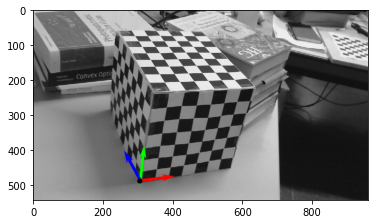

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ex4_3 as ex

%matplotlib inline

# load the input image
I = plt.imread('data/checkerboard_cube/cube_origin.png')
plt.imshow(I)
plt.show()

## 4.3.1 Get 3D-2D correspondences [2.5]

Again, similar to ex 3.1, choose a set of 3D points $X$ on the cube (control points) and find the corresponding points in the image by clicking. Choose 4 (non-degenerate) correspondences necessary to compute (3 correspondences for P3P) and identify the correct solution (1 correspondence). Visualize the clicked points by drawing over the image. 

In [ ]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np 


# load the input image
I = plt.imread('data/checkerboard_cube/cube0.jpg')
plt.imshow(I, cmap = 'gray')

# Compute 3D-2D correspondence
# TO DO: Define 3D control points (4 Points)
X = [[0, 0, 0],
     [7, 0, 0],
     [7, 0, 7],
     [7, 7, 7]]
print("3D points: \n", X)

# TODO: Get corresponding points from user by clicking
x = np.array(plt.ginput(len(X)))
new_order = [1, 0] # Switch x & y axis st normal from image plane is towards camera origin
x = x[:, new_order]
print("\n Corresponding image coordinates: \n", x)

plt.plot(x[:, 1], x[:, 0], 'rx')
plt.show()

3D points: 
 [[0, 0, 0], [7, 0, 0], [7, 0, 7], [7, 7, 7]]

 Corresponding image coordinates: 
 [[489.69006223 307.0092151 ]
 [453.03577044 565.74539245]
 [222.32934563 634.74170641]
 [ 61.33794639 482.37484642]]


In [ ]:
import numpy as np

In [1]:
# Save x to np array, for later load
x = np.array([[489.69006223, 307.0092151 ],
 [453.03577044, 565.74539245],
 [222.32934563, 634.74170641],
 [ 61.33794639, 482.37484642]])
print("\n Corresponding image coordinates: \n", x)
np.save('4_points_ex4_3.npy', x)
print('Data saved !')


 Corresponding image coordinates: 
 [[489.69006223 307.0092151 ]
 [453.03577044 565.74539245]
 [222.32934563 634.74170641]
 [ 61.33794639 482.37484642]]
Data saved !


In [ ]:
# Load cell for next time
x = np.load('4_points_ex4_3.npy')

## 4.3.2 Spatial Resection [7.5]

Implement P3P algorithm to estimate extrinsics by completing the function `spatial_resection`. The function takes as input 4 3D-2D correspondences, the camera intrisics $K$ and computes the extrinsics $R, X_0$. Print the estimated extrinsics and compare it the solution obtained in ex 3.1. Use the camera intrinsics K as given below (or your estimate from ex 3.1 or ex 3.2).

** Hints **
- Compute the angles $\alpha, \beta$ and $\gamma$ and the distances $s_1, s_2, s_3, s_4$.
- Identify the correct solution using the 4th point
- Compute the coordinate transformation to obtain $R$ and $X_0$ 

In [ ]:
# Camera intrinsics
K = [[-1280, 0, 272], 
    [0, -1280, 480],
    [0, 0, 1]]
K = np.array(K, dtype=np.float)

# Compute extrinsics using P3P
R, X0 = ex.spatial_resection(X, x, K)

print('Extrinsics: \n R = \n', R, ' \n X0 = \n', X0)